In [ ]:
!pip3 install statsmodels
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn

import numpy as np
import pandas as pd
import datetime
import statsmodels as sm
import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib inline

data = pd.read_csv('../datasets/airpassengers.csv')
data.head(10)


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


,date,AirPassengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [2]:
d = pd.date_range(start='1/1/1980', end='11/1/1990', freq='MS')
data['date'] = pd.date_range(start='1/1/1949', end='12/1/1960', freq='MS')
# data.set_index('date', inplace=True)
print(data)

          date  AirPassengers
0   1949-01-01            112
1   1949-02-01            118
2   1949-03-01            132
3   1949-04-01            129
4   1949-05-01            121
..         ...            ...
139 1960-08-01            606
140 1960-09-01            508
141 1960-10-01            461
142 1960-11-01            390
143 1960-12-01            432

[144 rows x 2 columns]


/var/folders/b_/wbdy6f91629bv_b6_g6bpbnc0000gn/T/ipykernel_7309/4191555600.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


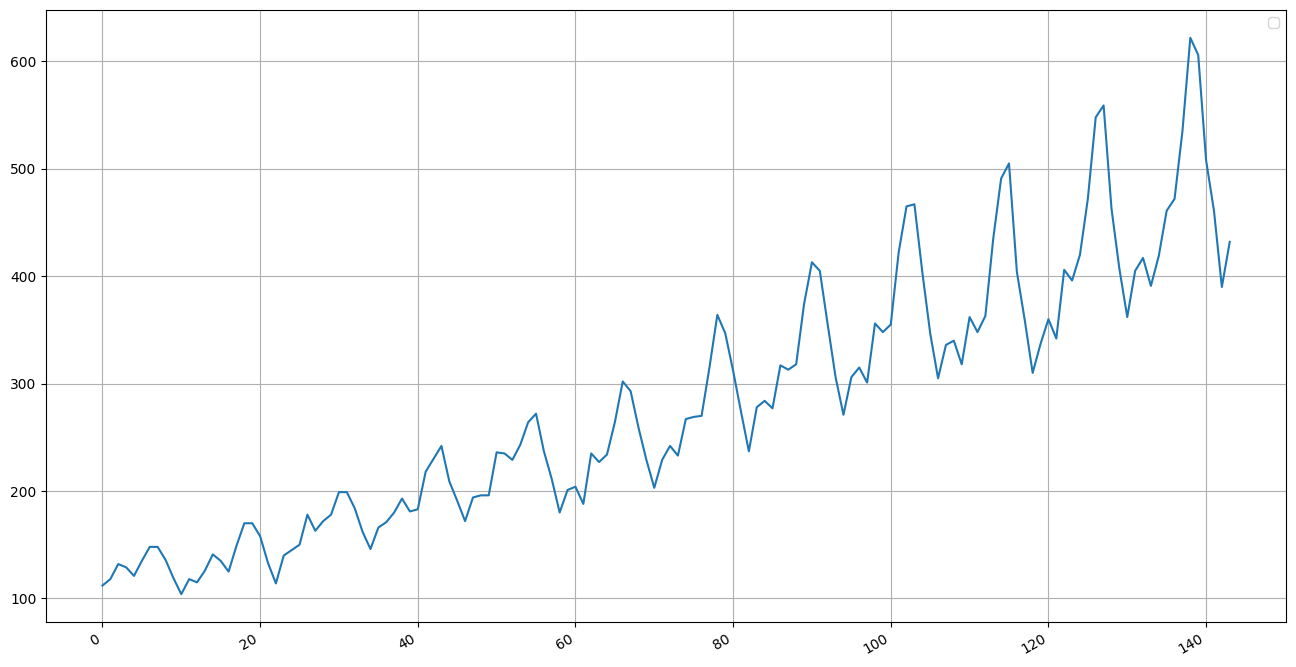

In [3]:
fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(data.AirPassengers)
ax.legend()
ax.grid()

In [4]:
# datashift = pd.DataFrame()
for i in range(1, 13):
   data['AirPassengers_' + str(i)] = data.AirPassengers.shift(i)
print(data)

          date  AirPassengers  AirPassengers_1  AirPassengers_2  \
0   1949-01-01            112              NaN              NaN   
1   1949-02-01            118            112.0              NaN   
2   1949-03-01            132            118.0            112.0   
3   1949-04-01            129            132.0            118.0   
4   1949-05-01            121            129.0            132.0   
..         ...            ...              ...              ...   
139 1960-08-01            606            622.0            535.0   
140 1960-09-01            508            606.0            622.0   
141 1960-10-01            461            508.0            606.0   
142 1960-11-01            390            461.0            508.0   
143 1960-12-01            432            390.0            461.0   

     AirPassengers_3  AirPassengers_4  AirPassengers_5  AirPassengers_6  \
0                NaN              NaN              NaN              NaN   
1                NaN              NaN        

In [5]:
data['month'] = data['date'].dt.month
print(data)

          date  AirPassengers  AirPassengers_1  AirPassengers_2  \
0   1949-01-01            112              NaN              NaN   
1   1949-02-01            118            112.0              NaN   
2   1949-03-01            132            118.0            112.0   
3   1949-04-01            129            132.0            118.0   
4   1949-05-01            121            129.0            132.0   
..         ...            ...              ...              ...   
139 1960-08-01            606            622.0            535.0   
140 1960-09-01            508            606.0            622.0   
141 1960-10-01            461            508.0            606.0   
142 1960-11-01            390            461.0            508.0   
143 1960-12-01            432            390.0            461.0   

     AirPassengers_3  AirPassengers_4  AirPassengers_5  AirPassengers_6  \
0                NaN              NaN              NaN              NaN   
1                NaN              NaN        

In [6]:
train = data.loc[:100].dropna()
test  = data.loc[100:].dropna()
x_train = train.loc[:, (train.columns != 'AirPassengers') & (train.columns != 'date')]
y_train = train['AirPassengers']
x_test  = test.loc[:, (test.columns != 'AirPassengers') & (test.columns != 'date')]
y_test  = test['AirPassengers']
print(x_train)
print(y_train)
x_train.dtypes

print(x_train.columns)


     AirPassengers_1  AirPassengers_2  AirPassengers_3  AirPassengers_4  \
12             118.0            104.0            119.0            136.0   
13             115.0            118.0            104.0            119.0   
14             126.0            115.0            118.0            104.0   
15             141.0            126.0            115.0            118.0   
16             135.0            141.0            126.0            115.0   
..               ...              ...              ...              ...   
96             306.0            271.0            306.0            355.0   
97             315.0            306.0            271.0            306.0   
98             301.0            315.0            306.0            271.0   
99             356.0            301.0            315.0            306.0   
100            348.0            356.0            301.0            315.0   

     AirPassengers_5  AirPassengers_6  AirPassengers_7  AirPassengers_8  \
12             148.0    

In [7]:
# import timeseries
# import importlib
# importlib.reload(timeseries)

from sklearn.model_selection import train_test_split

data.dropna(inplace=True)

X = data.loc[:, (train.columns != 'AirPassengers') & (train.columns != 'date')]
y = data['AirPassengers']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(x_train)
print(y_train)
print(x_test)



     AirPassengers_1  AirPassengers_2  AirPassengers_3  AirPassengers_4  \
12             118.0            104.0            119.0            136.0   
13             115.0            118.0            104.0            119.0   
14             126.0            115.0            118.0            104.0   
15             141.0            126.0            115.0            118.0   
16             135.0            141.0            126.0            115.0   
..               ...              ...              ...              ...   
99             356.0            301.0            315.0            306.0   
100            348.0            356.0            301.0            315.0   
101            355.0            348.0            356.0            301.0   
102            422.0            355.0            348.0            356.0   
103            465.0            422.0            355.0            348.0   

     AirPassengers_5  AirPassengers_6  AirPassengers_7  AirPassengers_8  \
12             148.0    

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf  = RandomForestRegressor(n_estimators=100, random_state=1, oob_score=True)
# rfe = RFE(rf, 4)
fit = rf.fit(x_train, y_train)

In [9]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = fit.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
y_pred = fit.predict(x_train)

# Evaluating the model
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_train, y_pred)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.963377364517174
Mean Squared Error: 31.06953586956523
R-squared: 0.9951092871034489


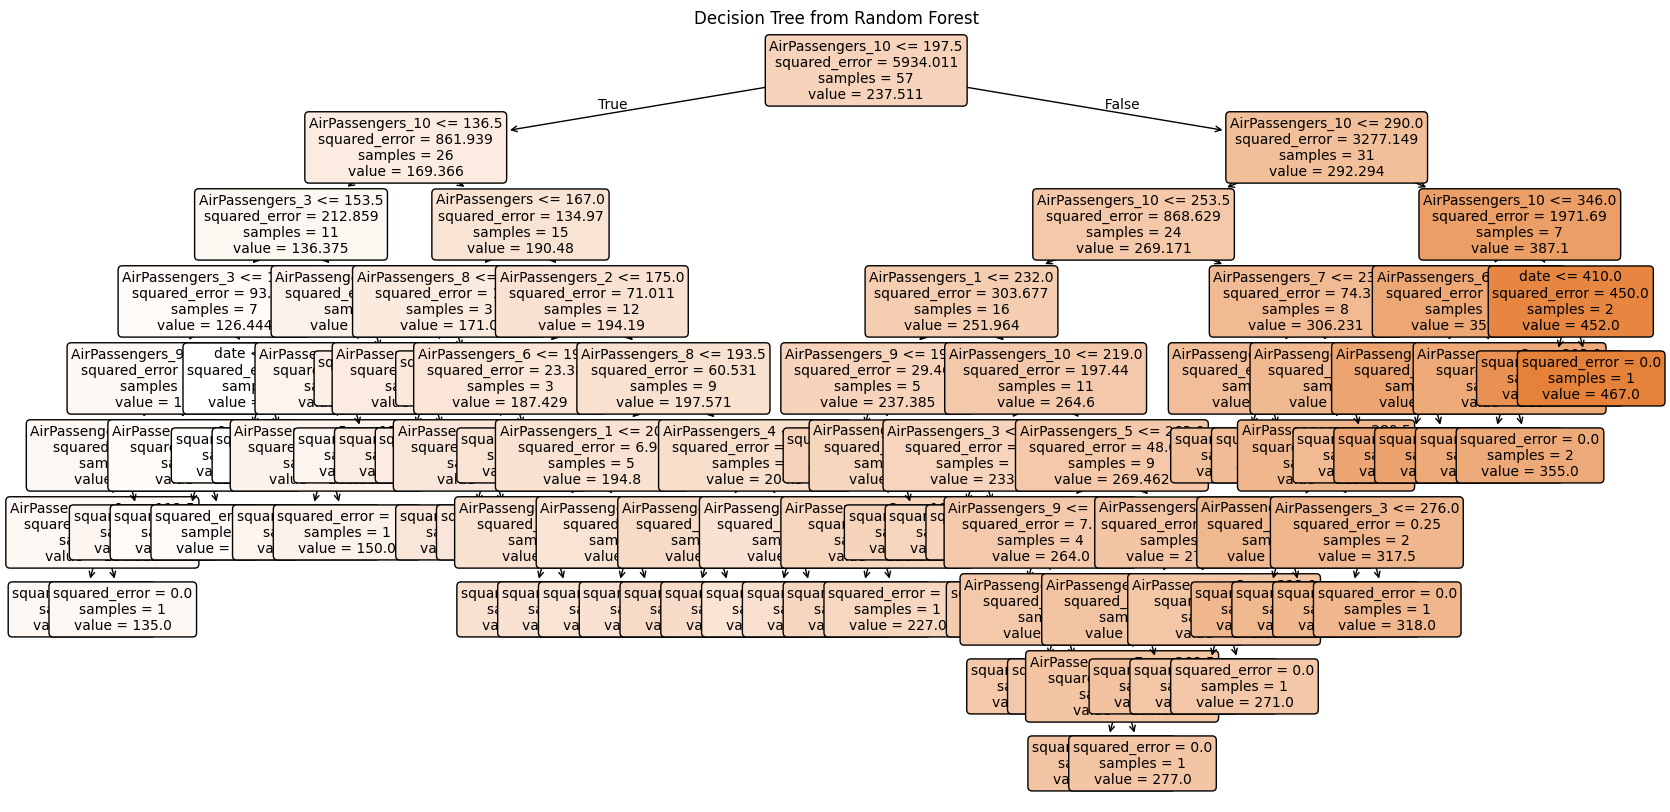

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = fit.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=data.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

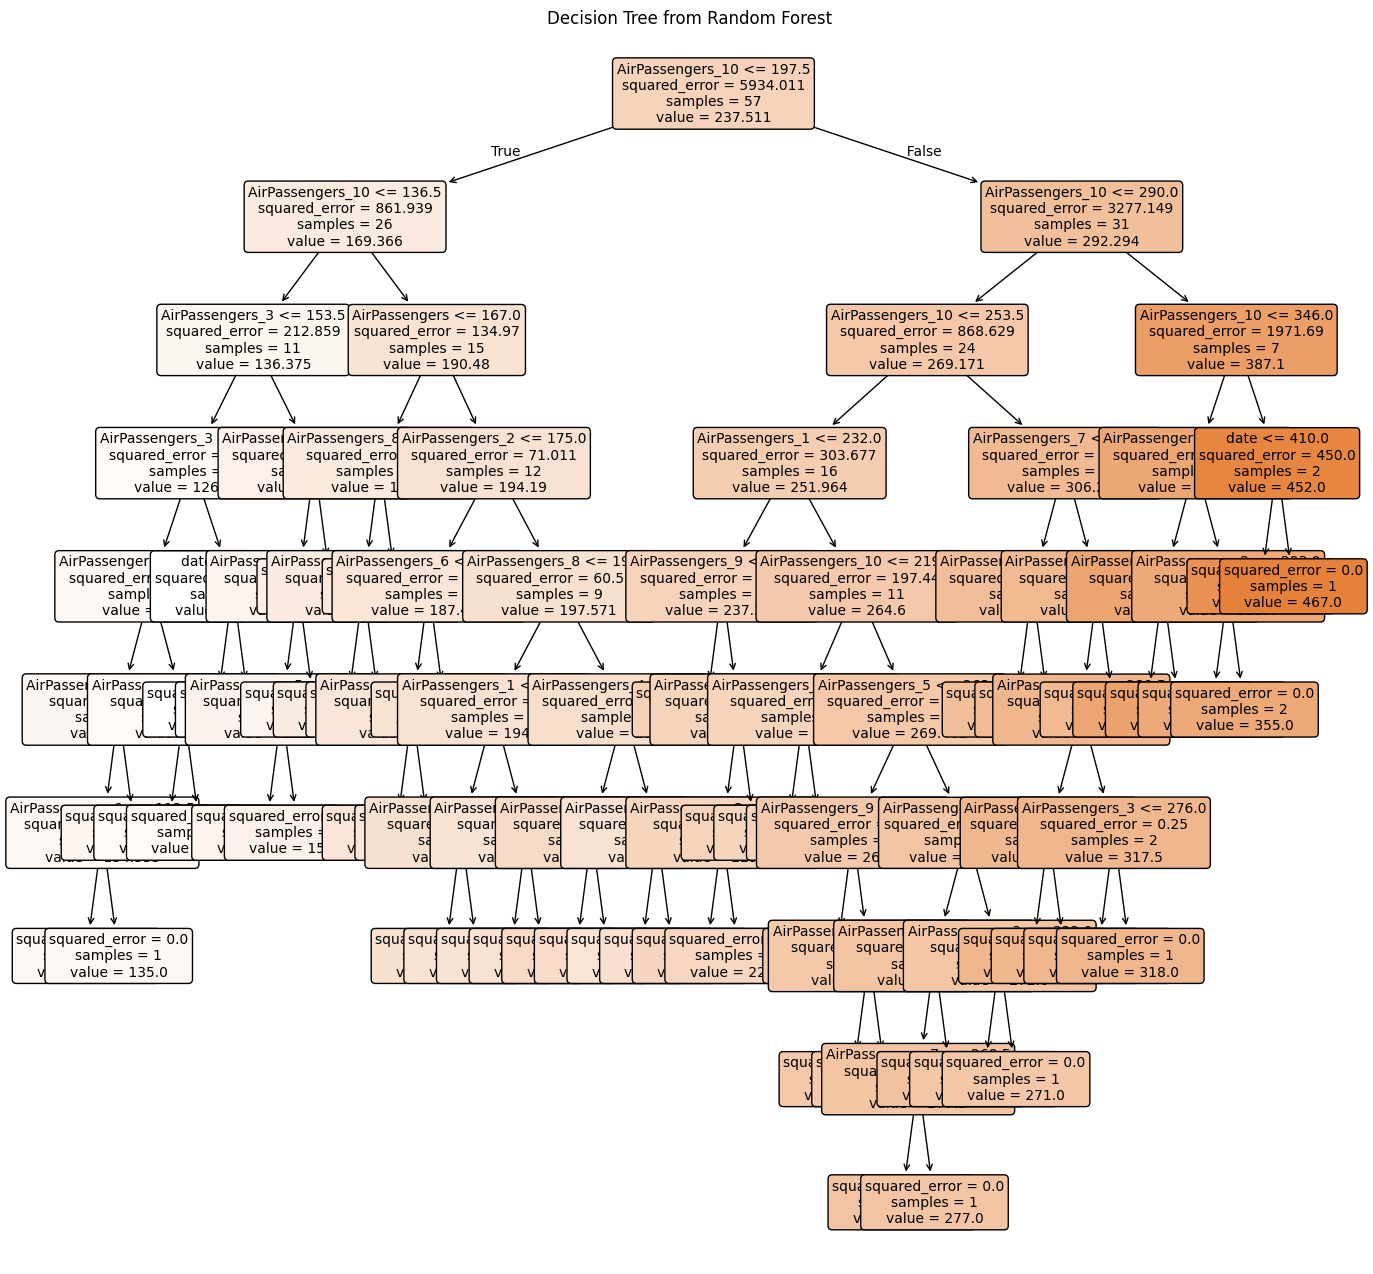

Mean Squared Error: 31.1
R-squared:  1.0
Mean Squared Error: 3250.8
R-squared:  0.5
Mean Squared Error: 31.1
R-squared:  1.0
Mean Squared Error: 3250.8
R-squared:  0.5


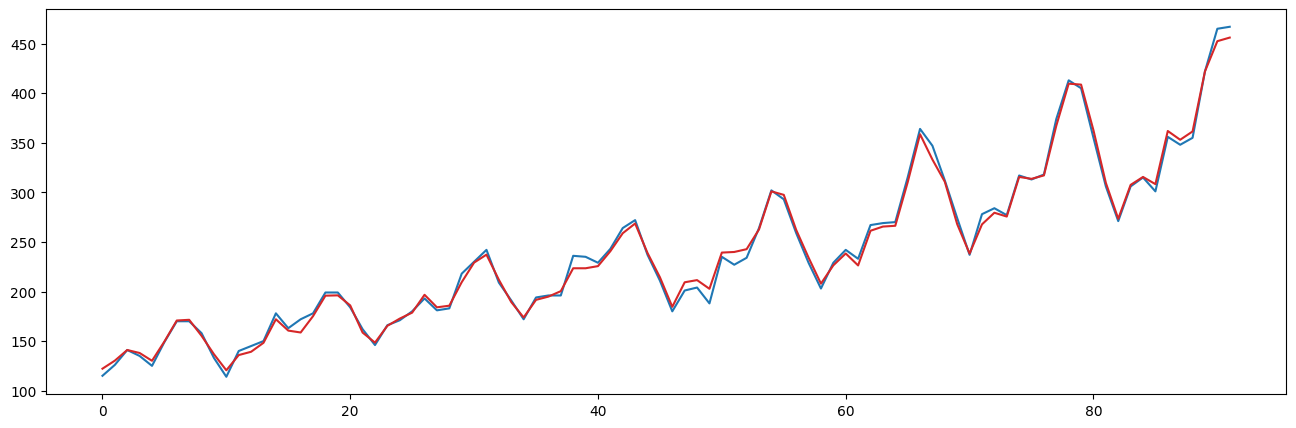

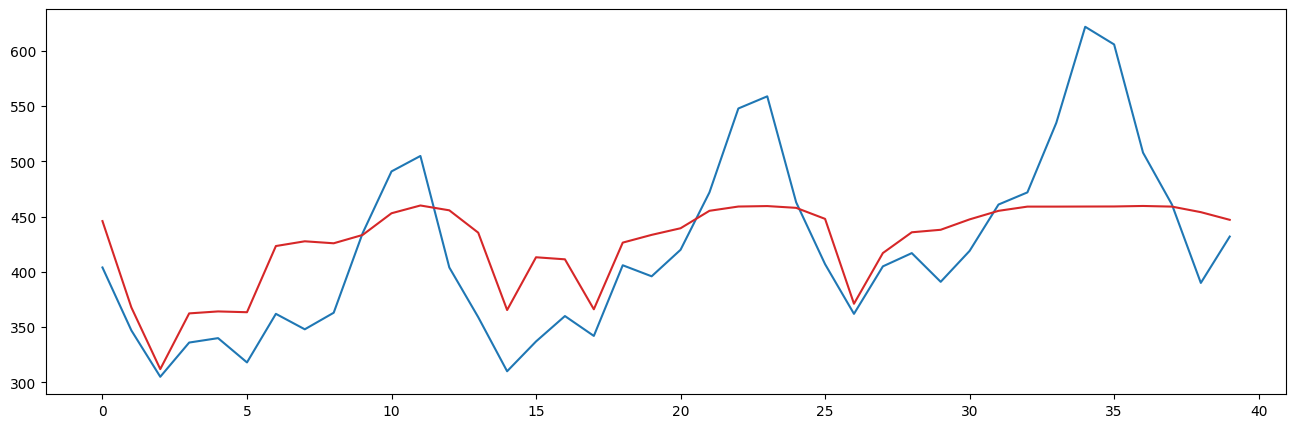

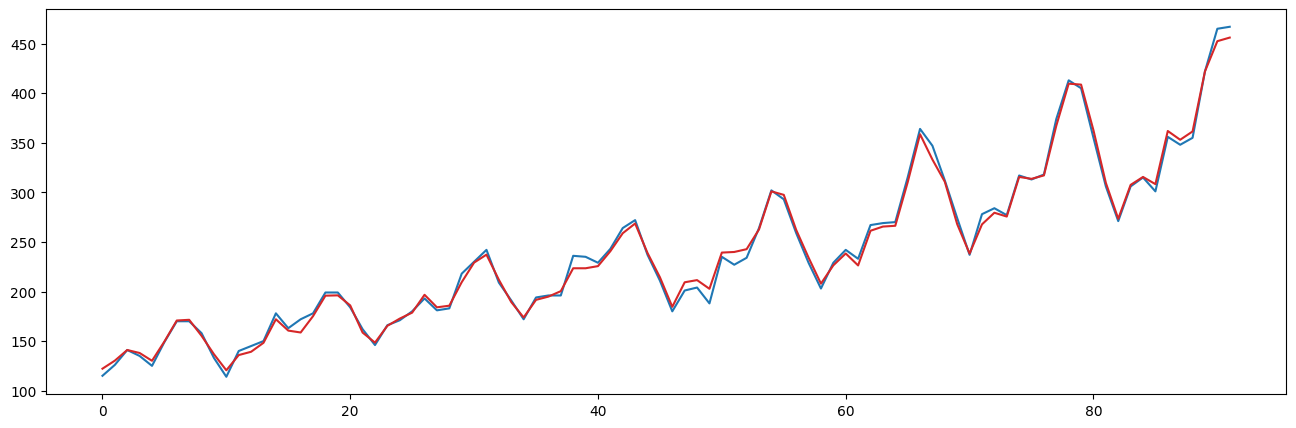

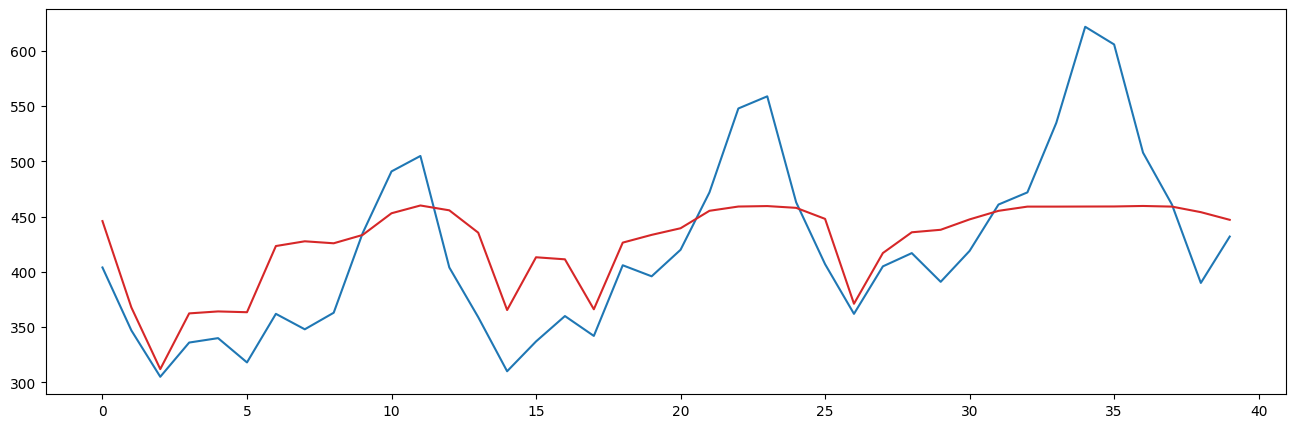

In [36]:
import importlib
import timeseries

importlib.reload(timeseries)


timeseries.plot_decision_tree(data, fit.estimators_[0])

y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)
timeseries.show_performance(y_train, y_train_pred)
timeseries.show_performance(y_test, y_test_pred)

timeseries.timeseries_model_eval(fit, x_train, y_train)
timeseries.timeseries_model_eval(fit, x_test, y_test)


12    -25.741667
13    -39.241667
14     -3.216667
15     -8.841667
16     -3.858333
         ...    
139    66.887500
140    17.225000
141   -21.891667
142   -56.595833
143   -30.450000
Name: seasonal, Length: 132, dtype: float64


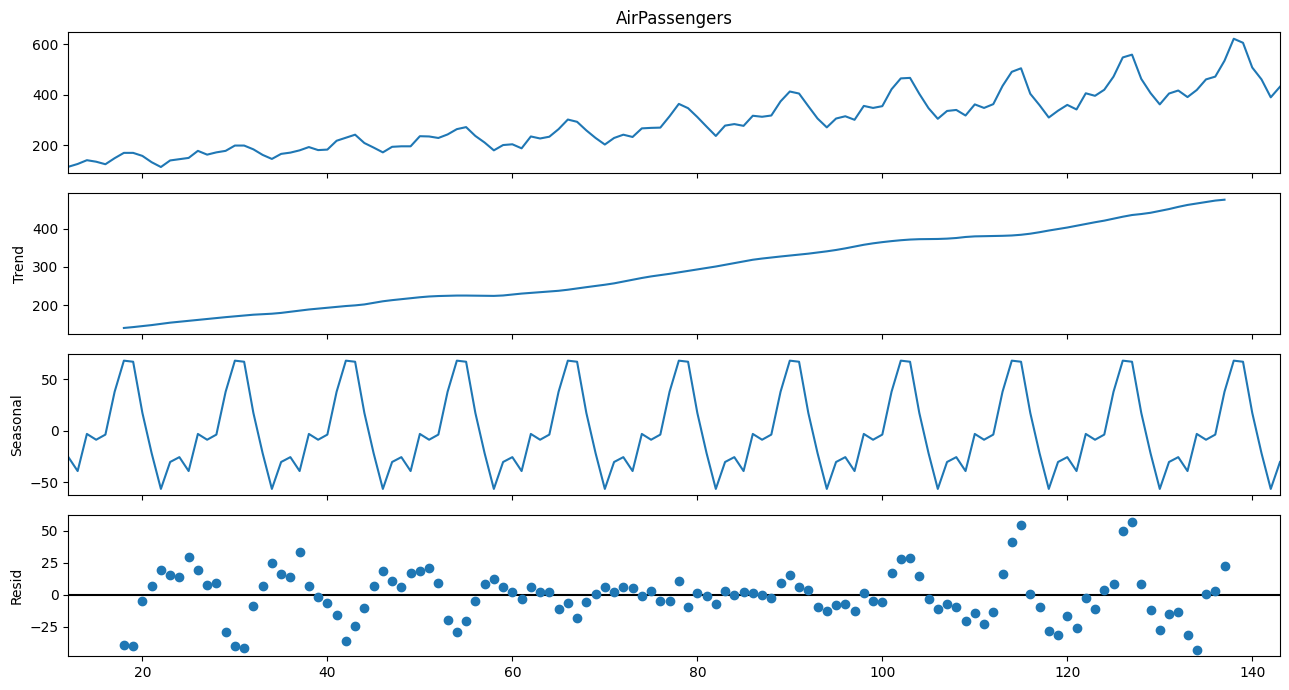

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['AirPassengers'], model='additive', period=12)
plt.rcParams["figure.figsize"] = [13, 7]
fig = decomposition.plot()

print(decomposition.seasonal)

/Users/sylbarth/Library/CloudStorage/GoogleDrive-sylvain.barthelemy@gwenlake.com/Mon Drive/Cours/Rennes 1 - 2025-2026/M2 Time Series/code/timeseries.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/sylbarth/Library/CloudStorage/GoogleDrive-sylvain.barthelemy@gwenlake.com/Mon Drive/Cours/Rennes 1 - 2025-2026/M2 Time Series/code/timeseries.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


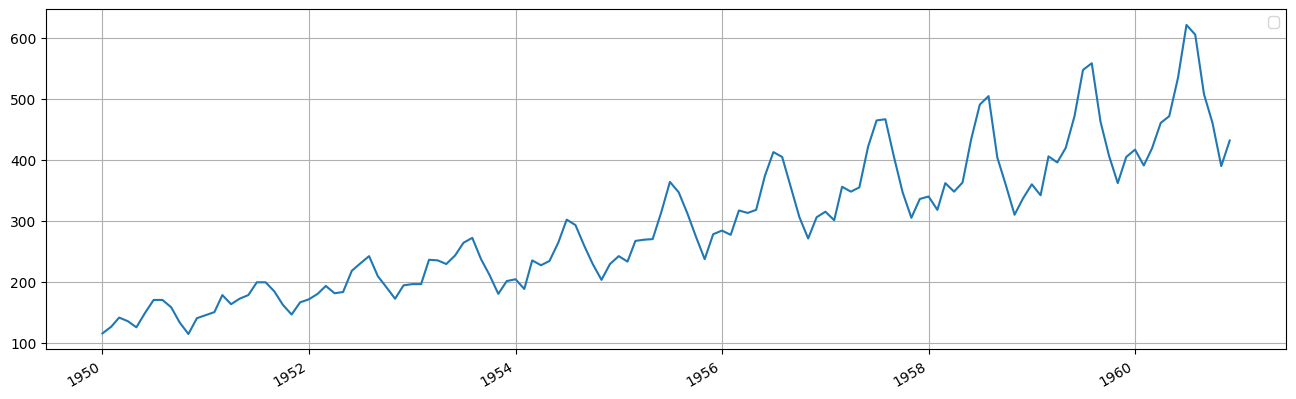

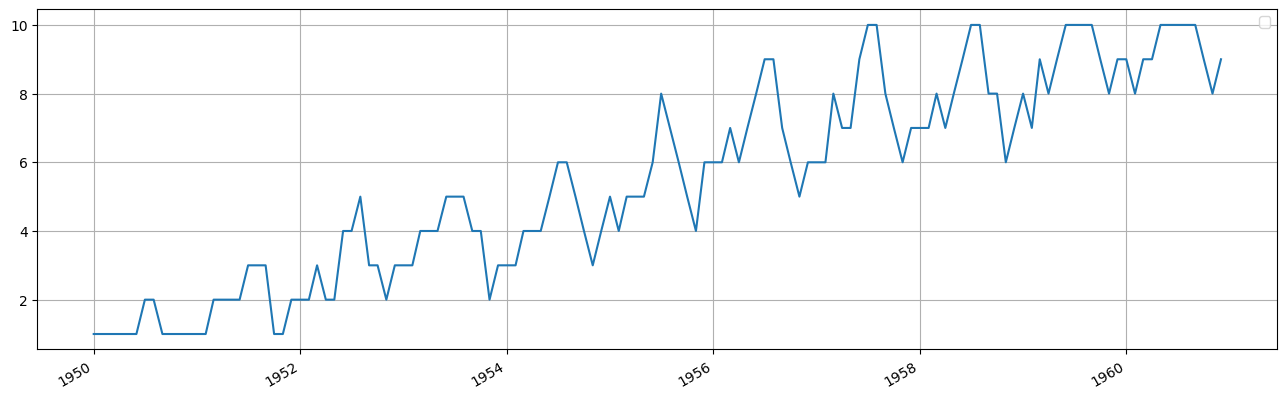

In [38]:
import importlib
import timeseries
importlib.reload(timeseries)

metrics = data.copy()
metrics.set_index('date', inplace=True)
metrics_q = timeseries.to_bins(metrics)

# print(metrics)
# print(metrics_q)

timeseries.plot(metrics.AirPassengers)
timeseries.plot(metrics_q.AirPassengers)


     AirPassengers_1  AirPassengers_2  AirPassengers_3  AirPassengers_4  \
12             118.0            104.0            119.0            136.0   
13             115.0            118.0            104.0            119.0   
14             126.0            115.0            118.0            104.0   
15             141.0            126.0            115.0            118.0   
16             135.0            141.0            126.0            115.0   
..               ...              ...              ...              ...   
139            622.0            535.0            472.0            461.0   
140            606.0            622.0            535.0            472.0   
141            508.0            606.0            622.0            535.0   
142            461.0            508.0            606.0            622.0   
143            390.0            461.0            508.0            606.0   

     AirPassengers_5  AirPassengers_6  AirPassengers_7  AirPassengers_8  \
12             148.0    

/Users/sylbarth/Library/CloudStorage/GoogleDrive-sylvain.barthelemy@gwenlake.com/Mon Drive/Cours/Rennes 1 - 2025-2026/M2 Time Series/code/timeseries.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


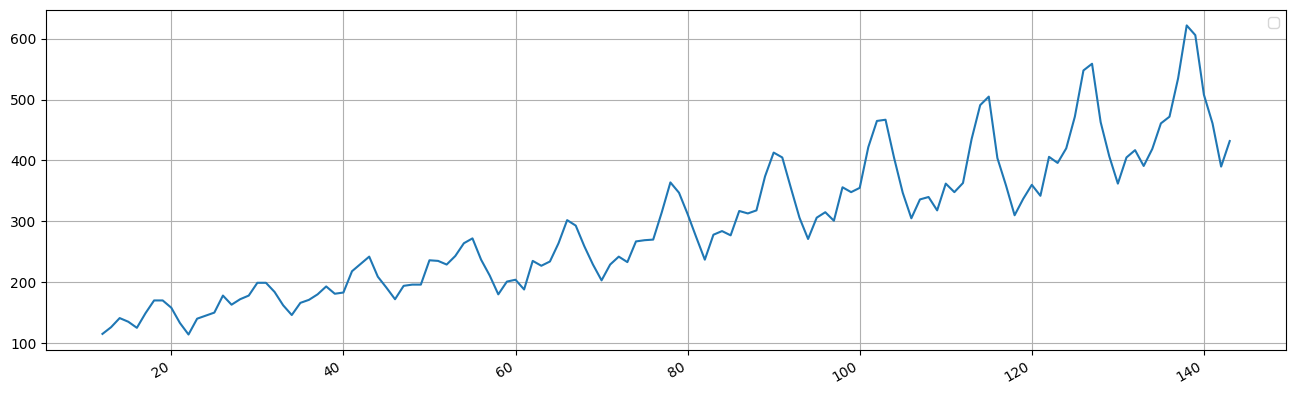

In [39]:
import importlib
import timeseries
importlib.reload(timeseries)

newdata = data.copy()
tsmodel = timeseries.TimeSeriesRandomForest(newdata, target="AirPassengers")
tsmodel.plot()

print(tsmodel.X)
print(tsmodel.y)

fit = tsmodel.fit(random_state=1)



